In [1]:
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
import PIL

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
print(np.__version__) # 1.13.3
print(PIL.__version__) # 4.3.0

1.13.3
4.3.0


In [3]:
from modules.create_images import open_image
from modules.create_images import save_derived_image
from modules.create_images import downscale_image
from modules.create_images import add_to_background
from modules.create_images import make_random_size

In [4]:
foreground_image_files = ['dog.png', 'tree.png', 'woman.png']
background_image_files = ['city.jpg', 'street.jpg', 'landscape.jpg']

foreground_images = [open_image(f) for f in foreground_image_files]
background_images = [None] + [downscale_image(open_image(b), 128, 128)
                     for b in background_image_files]


In [5]:
save_creations = True
show_creations = False

for i in range(100):
    l, t, w, h = make_random_size()
    foreground_idx = np.random.choice(len(foreground_images))
    background_idx = np.random.choice(len(background_images))
    added = add_to_background(
        foreground_images[foreground_idx],
        l, t, w, h,
        background_images[np.random.choice(len(background_images))],
    )
    if show_creations:
        added.show()
    if save_creations:
        save_derived_image(added, 'Derived/{0}_{1}_{2}.png'.format(foreground_idx, background_idx, i))


In [6]:
dogs = np.array([
    [np.asarray(add_to_background(foreground_images[j], *make_random_size()).convert('L'))
    for i in range(100)]
    for j in range(3)
])
doggos = np.fft.fft2(dogs)
doggo_magnitudes, doggo_angles = np.absolute(doggos), np.angle(doggos)


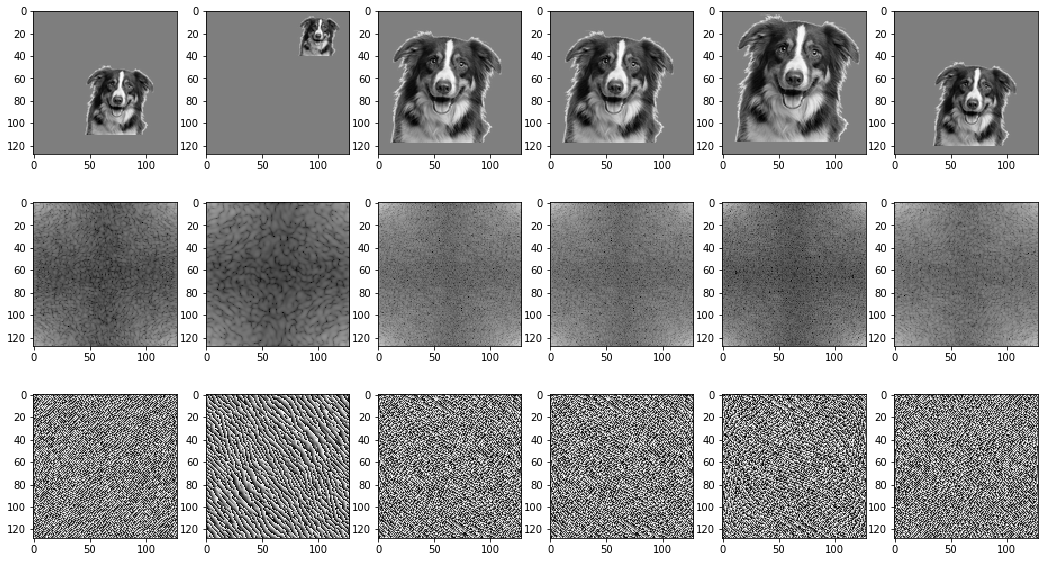

In [7]:
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
for j in range(6):
    random_doggo = np.random.choice(100)
    axes[0,j].imshow(dogs[0, random_doggo], cmap='gray')
    axes[1,j].imshow(np.log(doggo_magnitudes[0, random_doggo]), cmap='gray')
    axes[2,j].imshow(doggo_angles[0, random_doggo], cmap='gray')
plt.show()

In [8]:
ds = doggo_angles[0]

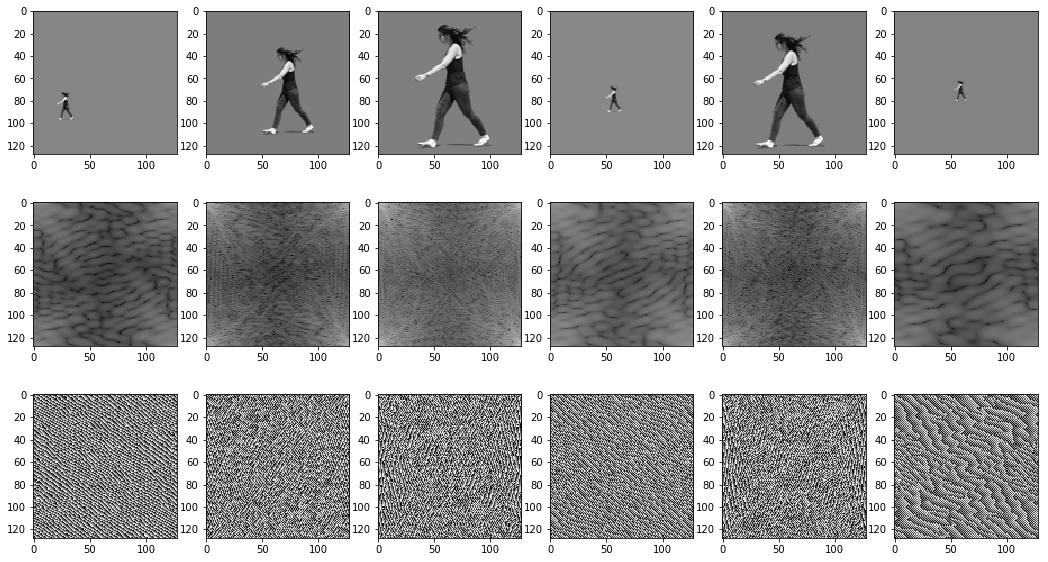

In [9]:
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
for j in range(6):
    random_doggo = np.random.choice(100)
    axes[0,j].imshow(dogs[2, random_doggo], cmap='gray')
    axes[1,j].imshow(np.log(doggo_magnitudes[2, random_doggo]), cmap='gray')
    axes[2,j].imshow(doggo_angles[2, random_doggo], cmap='gray')
plt.show()

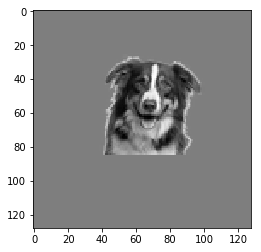

In [10]:
plt.imshow(dogs[0,0], cmap='gray')

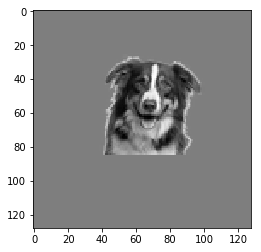

In [11]:
plt.imshow(np.real(np.fft.ifft2(doggo_magnitudes[0,0] * np.exp(1j * doggo_angles[0,0]))), cmap='gray')

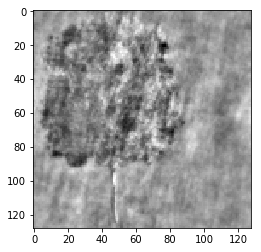

In [12]:
plt.imshow(np.real(np.fft.ifft2(doggo_magnitudes[0,0] * np.exp(1j * doggo_angles[1,0]))), cmap='gray')

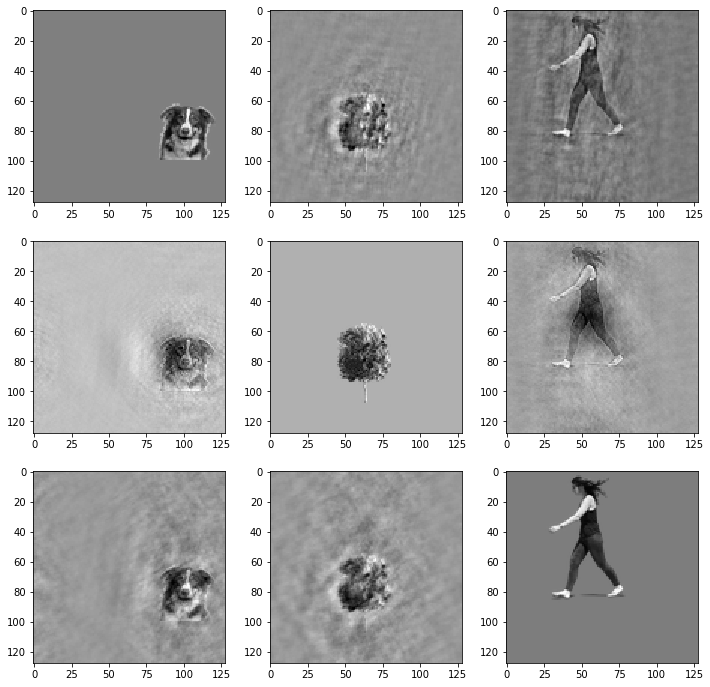

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
image_idx = np.random.choice(100)
for i in range(3):
    for j in range(3):
        magnitude = doggo_magnitudes[i, image_idx]
        angle = doggo_angles[j, image_idx]
        recon_image = np.real(np.fft.ifft2(magnitude * np.exp(1j * angle)))
        axes[i,j].imshow(recon_image, cmap='gray')
plt.show()

In [14]:
np.max(doggo_angles[0])

3.1415926535897931

In [15]:
ds.shape

(100, 128, 128)

In [16]:
d_flats = ds.reshape(ds.shape[0],-1)

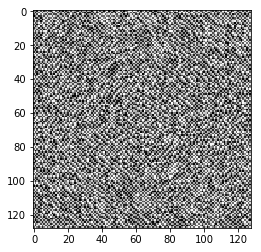

In [17]:
plt.imshow(ds[0], cmap='gray')

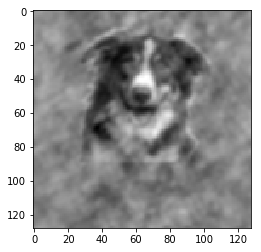

In [44]:
band = 3
lowpass_v = np.exp(-0.5*(np.arange(-band,band,2*band/128))**2)
lowpass = np.roll(np.outer(lowpass_v, lowpass_v), 64, (0, 1))
magnitude = doggo_magnitudes[2, 2]
angle = doggo_angles[0, 2]
recon_image = np.real(np.fft.ifft2(lowpass * magnitude * np.exp(1j * angle)))
plt.imshow(recon_image, cmap='gray')


In [115]:
sizes = range(0,128+32,32)
bws = [
    np.asarray(
        add_to_background(
            foreground_images[0],
            size,size,128,128,
            None,256,256
        ).convert('L')
    )
    for size in sizes
]


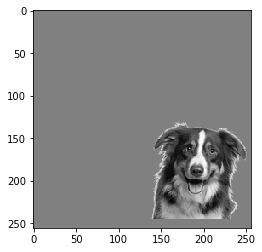

In [123]:
plt.imshow(bws[4],cmap='gray')

In [124]:
bwffts = [np.fft.fft2(bw) for bw in bws]

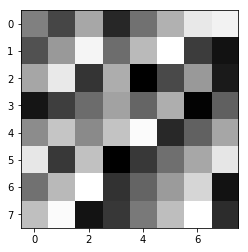

In [125]:
plt.imshow(np.angle(bwffts[4][:8,:8]), cmap='gray')

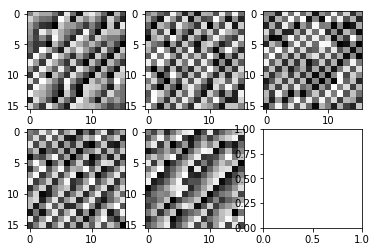

In [129]:
fig, axes = plt.subplots(2,3)
for i in range(len(bwffts)):
    axes.ravel()[i].imshow(np.angle(bwffts[i][:16,:16]), cmap='gray')